In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# !pip install conllu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import io
from conllu import parse_incr

with io.open("/content/en-train.conllu", "r", encoding="utf-8") as f:
    data = f.read()
sentences = data.strip().split("\n")
# for sentence in sentences:
#     # Parse the sentence using the parse_incr() function
#     tokenlist = parse_incr(io.StringIO(sentence))
#     print(tokenlist)

a=sentences[0:500]
a

['# id 309f5b26-951e-472b-948e-47632249862b\tdomain=en',
 'robert _ _ B-OtherPER',
 'gottschalk _ _ I-OtherPER',
 '1939 _ _ O',
 'academy _ _ B-VisualWork',
 'award _ _ I-VisualWork',
 'winner _ _ O',
 'and _ _ O',
 'founder _ _ O',
 'of _ _ O',
 'panavision _ _ B-ORG',
 '',
 '',
 '# id bb81b9a7-e73d-4977-b6a8-0f7937123dfe\tdomain=en',
 'during _ _ O',
 'the _ _ O',
 'reign _ _ O',
 'of _ _ O',
 'the _ _ O',
 'tongzhi _ _ B-OtherPER',
 'emperor _ _ I-OtherPER',
 '( _ _ O',
 'r _ _ O',
 '. _ _ O',
 '1861 _ _ O',
 '– _ _ O',
 '1875 _ _ O',
 ') _ _ O',
 ': _ _ O',
 '',
 '',
 '# id d79d2f50-bf45-47c5-96b5-73c3d0ce8914\tdomain=en',
 'further _ _ O',
 'research _ _ O',
 'led _ _ O',
 'in _ _ O',
 'the _ _ O',
 '1960s _ _ O',
 'to _ _ O',
 'the _ _ O',
 'bahadur _ _ B-OtherPER',
 'representation _ _ O',
 'which _ _ O',
 'provides _ _ O',
 'information _ _ O',
 'about _ _ O',
 'the _ _ O',
 'errorbounds _ _ O',
 '. _ _ O',
 '',
 '',
 '# id 6a65789e-e0ff-4263-8bd7-e56b836854c6\tdomain=en',
 'th

In [ ]:
# Splitting sentences
array=[]
c=[]
for i in sentences:
    if i.startswith("# id"):
        array.append(c)
        c=[]
    else:
        c.append(i)
array = [subarray for subarray in array if subarray]
print(array[0:50])
        

[['robert _ _ B-OtherPER', 'gottschalk _ _ I-OtherPER', '1939 _ _ O', 'academy _ _ B-VisualWork', 'award _ _ I-VisualWork', 'winner _ _ O', 'and _ _ O', 'founder _ _ O', 'of _ _ O', 'panavision _ _ B-ORG', '', ''], ['during _ _ O', 'the _ _ O', 'reign _ _ O', 'of _ _ O', 'the _ _ O', 'tongzhi _ _ B-OtherPER', 'emperor _ _ I-OtherPER', '( _ _ O', 'r _ _ O', '. _ _ O', '1861 _ _ O', '– _ _ O', '1875 _ _ O', ') _ _ O', ': _ _ O', '', ''], ['further _ _ O', 'research _ _ O', 'led _ _ O', 'in _ _ O', 'the _ _ O', '1960s _ _ O', 'to _ _ O', 'the _ _ O', 'bahadur _ _ B-OtherPER', 'representation _ _ O', 'which _ _ O', 'provides _ _ O', 'information _ _ O', 'about _ _ O', 'the _ _ O', 'errorbounds _ _ O', '. _ _ O', '', ''], ['the _ _ O', 'ideas _ _ O', 'were _ _ O', 'introduced _ _ O', 'by _ _ O', 'william _ _ B-OtherPER', 'burnside _ _ I-OtherPER', 'at _ _ O', 'the _ _ O', 'end _ _ O', 'of _ _ O', 'the _ _ O', 'nineteenth _ _ O', 'century _ _ O', '. _ _ O', '', ''], ['thaddeus _ _ B-OtherPER

In [ ]:
dt=[]
dl=[]
for i in array:
    #print(i)
    cc=[]
    tt=[]
    for j in i:
        if j!="":
            text=j.split(" _ _ ")
            cc.append(text[0])
            tt.append(text[1])
    dt.append(cc)
    dl.append(tt)
print(dt[0:3])
print(dl[0:3])

[['robert', 'gottschalk', '1939', 'academy', 'award', 'winner', 'and', 'founder', 'of', 'panavision'], ['during', 'the', 'reign', 'of', 'the', 'tongzhi', 'emperor', '(', 'r', '.', '1861', '–', '1875', ')', ':'], ['further', 'research', 'led', 'in', 'the', '1960s', 'to', 'the', 'bahadur', 'representation', 'which', 'provides', 'information', 'about', 'the', 'errorbounds', '.']]
[['B-OtherPER', 'I-OtherPER', 'O', 'B-VisualWork', 'I-VisualWork', 'O', 'O', 'O', 'O', 'B-ORG'], ['O', 'O', 'O', 'O', 'O', 'B-OtherPER', 'I-OtherPER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'], ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-OtherPER', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']]


In [ ]:
tag_values=[]
for i in dl:
    for j in i:
        if j not in tag_values:
            tag_values.append(j)
tag_values.append("PAD")
tag2idx = {t: i for i, t in enumerate(tag_values)}
tag2idx

{'B-OtherPER': 0,
 'I-OtherPER': 1,
 'O': 2,
 'B-VisualWork': 3,
 'I-VisualWork': 4,
 'B-ORG': 5,
 'B-Artist': 6,
 'I-Artist': 7,
 'B-HumanSettlement': 8,
 'B-WrittenWork': 9,
 'B-Software': 10,
 'I-Software': 11,
 'I-WrittenWork': 12,
 'B-Politician': 13,
 'I-Politician': 14,
 'B-Athlete': 15,
 'I-Athlete': 16,
 'B-MusicalWork': 17,
 'I-MusicalWork': 18,
 'I-HumanSettlement': 19,
 'B-Facility': 20,
 'I-Facility': 21,
 'B-Scientist': 22,
 'I-Scientist': 23,
 'B-Cleric': 24,
 'I-Cleric': 25,
 'I-ORG': 26,
 'B-SportsGRP': 27,
 'B-MusicalGRP': 28,
 'I-MusicalGRP': 29,
 'B-SportsManager': 30,
 'I-SportsManager': 31,
 'B-PublicCorp': 32,
 'I-PublicCorp': 33,
 'B-OtherPROD': 34,
 'B-MedicalProcedure': 35,
 'I-MedicalProcedure': 36,
 'B-ArtWork': 37,
 'I-ArtWork': 38,
 'B-Food': 39,
 'I-Food': 40,
 'B-Station': 41,
 'I-Station': 42,
 'I-OtherPROD': 43,
 'B-CarManufacturer': 44,
 'B-OtherLOC': 45,
 'I-OtherLOC': 46,
 'B-PrivateCorp': 47,
 'I-SportsGRP': 48,
 'B-Disease': 49,
 'B-Vehicle': 50,


In [ ]:
# !pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# !pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertConfig

from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

torch.__version__


'2.0.0+cu118'

In [ ]:
Max_length = 75
batch_size = 32

In [ ]:
# !pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu111/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu111/torch_stable.html


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False) 

In [ ]:
def tokenize_and_preserve_labels(sentence, text_labels):
    tokenized_sentence = []
    labels = []

    for word, label in zip(sentence, text_labels):
        tokenized_word = tokenizer.tokenize(word)
        n_subwords = len(tokenized_word)
        tokenized_sentence.extend(tokenized_word)
        labels.extend([label] * n_subwords)
    return tokenized_sentence, labels

In [ ]:
tokenized_texts_and_labels = [
    tokenize_and_preserve_labels(sent, labs)
    for sent, labs in zip(dt, dl)
]

In [ ]:
tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]
labels = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels]


In [ ]:
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=Max_length, dtype="long", value=0.0,
                          truncating="pre", padding="pre")
input_ids

array([[    0,     0,     0, ..., 13316, 21704,  8427],
       [    0,     0,     0, ...,  6932,   114,   131],
       [    0,     0,     0, ...,  8346,  1116,   119],
       ...,
       [    0,     0,     0, ...,  2308,  4291,   119],
       [    0,     0,     0, ...,  1266,  1701,   119],
       [    0,     0,     0, ...,  1155, 13244,   119]])

In [ ]:
tags = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labels],
                     maxlen=Max_length, value=tag2idx["PAD"], padding="pre",
                     dtype="long", truncating="pre")
tags

array([[67, 67, 67, ...,  5,  5,  5],
       [67, 67, 67, ...,  2,  2,  2],
       [67, 67, 67, ...,  2,  2,  2],
       ...,
       [67, 67, 67, ...,  2,  2,  2],
       [67, 67, 67, ..., 47, 52,  2],
       [67, 67, 67, ..., 47, 47,  2]])

In [ ]:
attention_masks = [[float(i != 0.0) for i in ii] for ii in input_ids]


In [ ]:
tr_inputs, val_inputs, tr_tags, val_tags = train_test_split(input_ids, tags,
                                                            random_state=2018, test_size=0.2)
tr_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.2)

In [ ]:
# convert to torch tenors
tr_inputs = torch.tensor(tr_inputs)
val_inputs = torch.tensor(val_inputs)
tr_tags = torch.tensor(tr_tags)
val_tags = torch.tensor(val_tags)
tr_masks = torch.tensor(tr_masks)
val_masks = torch.tensor(val_masks)

In [ ]:
# training time by shuffling of the data and testing time as we pass them sequentially
train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)
valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=batch_size)

In [ ]:
import transformers
from transformers import BertForTokenClassification, AdamW

'4.29.0'

In [ ]:
model = BertForTokenClassification.from_pretrained(
    "bert-base-cased",
    num_labels=len(tag2idx),
    output_attentions = True,
    output_hidden_states = False
)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

In [ ]:
model.cuda();

In [ ]:
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model.classifier.named_parameters())
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

optimizer = torch.optim.AdamW(
    optimizer_grouped_parameters,
    lr=3e-5,
    eps=1e-8
)

In [ ]:
# schduler to reduce learning rate linearly throughout the epochs
from transformers import get_linear_schedule_with_warmup
epochs = 10
max_grad_norm = 1.0
# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs
# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

In [ ]:
# !pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from seqeval.metrics import f1_score

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=2).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
from tqdm import tqdm, trange
# Store the average loss after each epoch, for plotting
loss_values, validation_loss_values = [], []

for _ in trange(epochs, desc="Epoch"):
    # Training
    # Putting the model into training mode.
    model.train()
    total_loss = 0
    # Training using loop
    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        model.zero_grad()
        # because we have provide
        outputs = model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)
        # loss
        loss = outputs[0]
        # Perform a backward pass, calculate gradients
        loss.backward()
        total_loss += loss.item()
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        # parameter update
        optimizer.step()
        # learning rate update
        scheduler.step()

    # average loss over the training data
    avg_train_loss = total_loss / len(train_dataloader)
    print("Average train loss: {}".format(avg_train_loss))
    loss_values.append(avg_train_loss)


    # Validation
    model.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    predictions , true_labels = [], []
    for batch in valid_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():
            outputs = model(b_input_ids, token_type_ids=None,
                            attention_mask=b_input_mask, labels=b_labels)
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculating the accuracy for this batch of test sentences
        eval_loss += outputs[0].mean().item()
        eval_accuracy += flat_accuracy(logits, label_ids)
        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.extend(label_ids)

        nb_eval_examples += b_input_ids.size(0)
        nb_eval_steps += 1

    eval_loss = eval_loss / nb_eval_steps
    validation_loss_values.append(eval_loss)
    print("Validation loss: {}".format(eval_loss))
    print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))
    pred_tags = [tag_values[p_i] for p, l in zip(predictions, true_labels)
                                 for p_i, l_i in zip(p, l) if tag_values[l_i] != "PAD"]
    valid_tags = [tag_values[l_i] for l in true_labels
                                  for l_i in l if tag_values[l_i] != "PAD"]
    print("Validation F1-Score: {}".format(f1_score([pred_tags], [valid_tags])))
    print()

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Average train loss: 0.3749992466398648
Validation loss: 0.1929098340727034
Validation Accuracy: 0.9485374149659869


Epoch:  10%|█         | 1/10 [03:12<28:48, 192.04s/it]

Validation F1-Score: 0.45379580039105666

Average train loss: 0.16069512099382424
Validation loss: 0.1460823857358524
Validation Accuracy: 0.9590912698412699


Epoch:  20%|██        | 2/10 [06:22<25:29, 191.22s/it]

Validation F1-Score: 0.5666596770811491

Average train loss: 0.11114241125150806
Validation loss: 0.1402423416574796
Validation Accuracy: 0.9617035147392287


Epoch:  30%|███       | 3/10 [09:33<22:16, 190.95s/it]

Validation F1-Score: 0.5954485920104782

Average train loss: 0.08162323070601338
Validation loss: 0.14438022886003768
Validation Accuracy: 0.9625323129251695


Epoch:  40%|████      | 4/10 [12:43<19:05, 190.85s/it]

Validation F1-Score: 0.6110814912028872

Average train loss: 0.06151285312094149
Validation loss: 0.1476619901401656
Validation Accuracy: 0.9630255102040817


Epoch:  50%|█████     | 5/10 [15:54<15:53, 190.79s/it]

Validation F1-Score: 0.610878661087866

Average train loss: 0.046440267185902315
Validation loss: 0.1520855948328972
Validation Accuracy: 0.9636700680272108


Epoch:  60%|██████    | 6/10 [19:05<12:42, 190.74s/it]

Validation F1-Score: 0.6320651513309833

Average train loss: 0.036399157870826974
Validation loss: 0.1594133110273452
Validation Accuracy: 0.963724489795918


Epoch:  70%|███████   | 7/10 [22:15<09:32, 190.70s/it]

Validation F1-Score: 0.6278131806082117

Average train loss: 0.02921092329724204
Validation loss: 0.162236208149365
Validation Accuracy: 0.9644297052154194


Epoch:  80%|████████  | 8/10 [25:26<06:21, 190.65s/it]

Validation F1-Score: 0.6336327791553189

Average train loss: 0.02453946256344872
Validation loss: 0.16703350927148547
Validation Accuracy: 0.9639744897959185


Epoch:  90%|█████████ | 9/10 [28:37<03:10, 190.65s/it]

Validation F1-Score: 0.6287430008926399

Average train loss: 0.021199388165647783
Validation loss: 0.16955448374861762
Validation Accuracy: 0.9641048752834467


Epoch: 100%|██████████| 10/10 [31:47<00:00, 190.76s/it]

Validation F1-Score: 0.6321895027176118



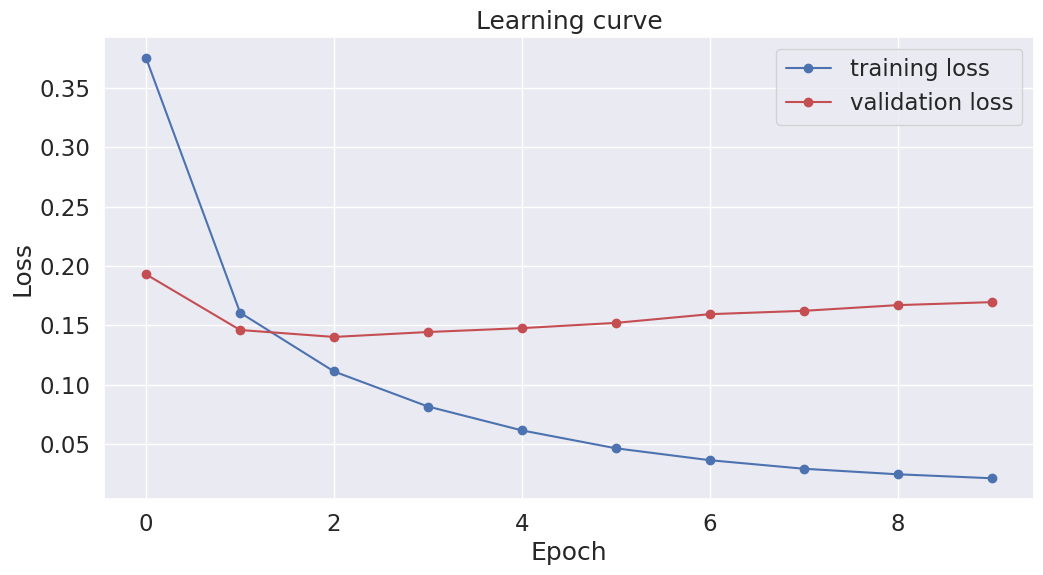

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(loss_values, 'b-o', label="training loss")
plt.plot(validation_loss_values, 'r-o', label="validation loss")
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()